In [260]:
import numpy as np
import matplotlib.pylab as plt

In [297]:
dark_current = 0.15 #e/p/s
Read_noise = 9.3 #e

In [298]:
exposure_time = [10,20,30,40,50,60,70,80,90,100,150,180,210,270,300,400,500,600] #s

In [299]:
n_pixel = [38,51,27,40,30,64,79,51,56,39,51,64,76,78,171,154,69,92]

In [300]:
S_source = [2035.92,3539,5323.56,5132.68,7420.97,7396.62,7354.94,7938.56,11752.2,10642,12669.2,11907.9,14187,14747.2,14707.2,20520.9,23641.4,25890.6]

In [301]:
n_pixel_Sky = [630,600,566,613,564,626,756,591,625,670,265,906,1142,595,1319,2090,727,726]

In [302]:
S_sky = [1116.53,1291.2,1477,1648.53,1810.83,1993.36,2140.3,2352.54,2480.11,1782.64,2500.28,3076.06,5238.64,5492.55,6706.26,6962.98,9249.56,11970.5]

In [303]:
n_pixel = np.array(n_pixel)
n_pixel_Sky = np.array(n_pixel_Sky)
S_sky = np.array(S_sky)
S_source = np.array(S_source)
exposure_time = np.array(exposure_time)

In [304]:
SNR = S_source/np.sqrt(S_source + n_pixel*(1+(n_pixel/n_pixel_Sky))*(S_sky + exposure_time*dark_current + Read_noise**2))

In [305]:
SNR

array([ 9.05358541, 12.51698985, 23.88451542, 18.2246426 , 28.54109958,
       18.80256427, 16.34147359, 20.93972017, 28.57195134, 35.79285331,
       30.60584315, 24.80495116, 21.18681651, 20.63944237, 12.72623934,
       18.76381669, 27.58273437, 22.83945782])

Text(0, 0.5, 'SNR')

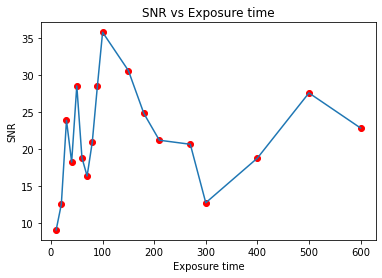

In [306]:
plt.plot(exposure_time, SNR, 'ro')
plt.plot(exposure_time, SNR)
plt.title('SNR vs Exposure time')
plt.xlabel('Exposure time')
plt.ylabel('SNR')